# Introduction au Feature Engineering
Le **feature engineering** est un processus essentiel dans la préparation des données pour le machine learning. Il consiste à transformer, sélectionner, et créer de nouvelles caractéristiques à partir des données brutes afin d'améliorer la performance des modèles.

In [ ]:
import pandas as pd # importe la bibliothèque pandas avec alias pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler # importation des classes MinMaxScaler et StandarScaler

# Exemple de données
data = pd.DataFrame({
    'Age': [22, 45, 28, 35, 50],
    'Salaire': [30000, 60000, 35000, 50000, 70000] # crée une DataFrame à partir d'un dictionnaire
})

scaler = MinMaxScaler() # crée de l'obejet MinMaxScaler
data_scaled = scaler.fit_transform(data[['Salaire']]) # Normalise sur la colonne Salaire de data
data['Salaire_Normalisé'] = data_scaled # ajout de la colonne Salaire_Normalisé au data

scaler = StandardScaler() # crée de l'obejet StandarScaler
data_standardized = scaler.fit_transform(data[['Salaire']]) # Normalise sur la colonne Salaire de data
data['Salaire_Standardisé'] = data_standardized# ajoute la colonne Salaire_Normalisé au data

data # affiche data


,Age,Salaire,Salaire_Normalisé,Salaire_Standardisé
0,22,30000,0.000,-1.269491
1,45,60000,0.750,0.734968
2,28,35000,0.125,-0.935414
3,35,50000,0.500,0.066815
4,50,70000,1.000,1.403122


In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder  # Pour encoder les variables catégorielles

# Exemple de données catégorielles
data_cat = pd.DataFrame({
    'Sexe': ['Homme', 'Femme', 'Homme', 'Femme', 'Homme']
}) # crée une DataFrame à partir d'un dictionnaire

encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False permet de retourner un tableau dense
encoded_data = encoder.fit_transform(data_cat[['Sexe']]) # transforme les valeurs de Sexe par OneHotEncoder
encoded_df = pd.DataFrame(encoded_data, columns=encoder.categories_[0])  # Crée un DataFrame avec les colonnes encodées
data_cat = data_cat.join(encoded_df)  # Joint les nouvelles colonnes encodées au DataFrame original

label_encoder = LabelEncoder() # objet de labelEncoder
data_cat['Sexe_Label'] = label_encoder.fit_transform(data_cat['Sexe']) # transforme les valeurs de Sexe par label_encoder
data_cat # affiche data_cat


,Sexe,Femme,Homme,Sexe_Label
0,Homme,0.0,1.0,1
1,Femme,1.0,0.0,0
2,Homme,0.0,1.0,1
3,Femme,1.0,0.0,0
4,Homme,0.0,1.0,1


In [ ]:
data_missing = pd.DataFrame({
    'Age': [22, None, 28, None, 50],
    'Salaire': [30000, 60000, None, 50000, 70000]
})# crée une DataFrame à partir d'un dictionnaire avec des valeurs manquantes

data_missing['Age'] = data_missing['Age'].fillna(data_missing['Age'].mean()) # remplace les valeurs manquantes par la moyenne de Age
data_missing['Salaire'] = data_missing['Salaire'].fillna(data_missing['Salaire'].mean()) # remplace les valeurs manquantes par la moyenne de Salaire

data_missing # affiche data_missing


,Age,Salaire
0,22.000000,30000.0
1,33.333333,60000.0
2,28.000000,52500.0
3,33.333333,50000.0
4,50.000000,70000.0


In [ ]:
data['Salaire_Par_An'] = data['Salaire'] / 12 # crée Salaire_Par_An en divisant Salaire par 12
data['Age_Années_Restantes'] = 65 - data['Age'] # crée Age_Années_Restantes en soustrant l'Age dans 65

data # affiche data


,Age,Salaire,Salaire_Normalisé,Salaire_Standardisé,Salaire_Par_An,Age_Années_Restantes
0,22,30000,0.000,-1.269491,2500.000000,43
1,45,60000,0.750,0.734968,5000.000000,20
2,28,35000,0.125,-0.935414,2916.666667,37
3,35,50000,0.500,0.066815,4166.666667,30
4,50,70000,1.000,1.403122,5833.333333,15


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif  # selectionne les meilleures caractéristiques

# Exemple de données
X = pd.DataFrame({
    'Age': [22, 45, 28, 35, 50],
    'Salaire': [30000, 60000, 35000, 50000, 70000],
    'Experience': [1, 15, 5, 10, 20]
})# crée une DataFrame à partir d'un dictionnaire

y = [0, 1, 0, 1, 1] #crée une variable cible

selector = SelectKBest(f_classif, k=2) # objet de la classe SelectKBest
X_new = selector.fit_transform(X, y) # selectionne des deux meilleures caractéristiques

selected_features = X.columns[selector.get_support()]# Extraire les variables selectionner
selected_features


Index(['Age', 'Salaire'], dtype='object')

In [ ]:
selected_features = data.columns[selector.get_support()]# Extraire les variables selectionner
print('colonnes selectionnées:',selected_features)
x_neuw_data=pd.DataFrame(X_new,columns=selected_features)
print(x_neuw_data)

colonnes selectionnées: Index(['gene_7', 'gene_1614', 'gene_4174', 'gene_6819', 'gene_7512',
       'gene_10143', 'gene_10393', 'gene_12605', 'gene_14766', 'gene_19653'],
      dtype='object')
       gene_7  gene_1614  gene_4174  gene_6819  gene_7512  gene_10143  \
0    0.591871   0.000000   0.000000   6.865820   7.190289    4.377061   
1    0.000000   0.000000   1.813607   8.334050   8.173652    6.247062   
2    0.452595   0.000000   0.000000   4.763576   7.756223    5.804921   
3    0.434882   0.000000   1.637239   5.967242   7.408194    5.336301   
4    0.360982   0.000000   3.661658   7.552800   8.107960    4.960368   
..        ...        ...        ...        ...        ...         ...   
796  0.496922   0.000000   2.841671   7.730477   8.224711    5.368112   
797  0.000000   0.000000   0.618051   7.714871   6.204127    5.000721   
798  1.811101   4.464433   1.002595   8.131924   8.393240    5.733061   
799  0.000000   0.000000   0.000000   6.738930   7.715214    5.691272   
800 

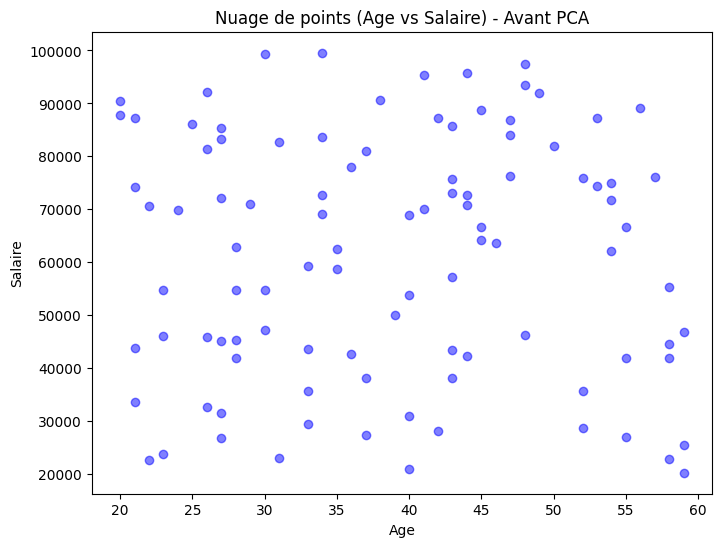

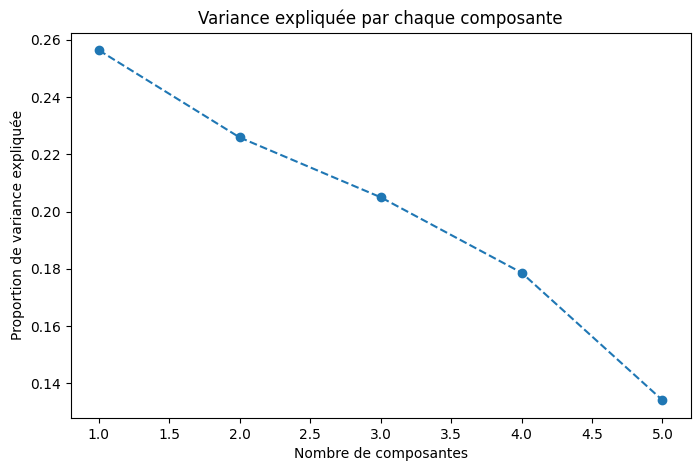

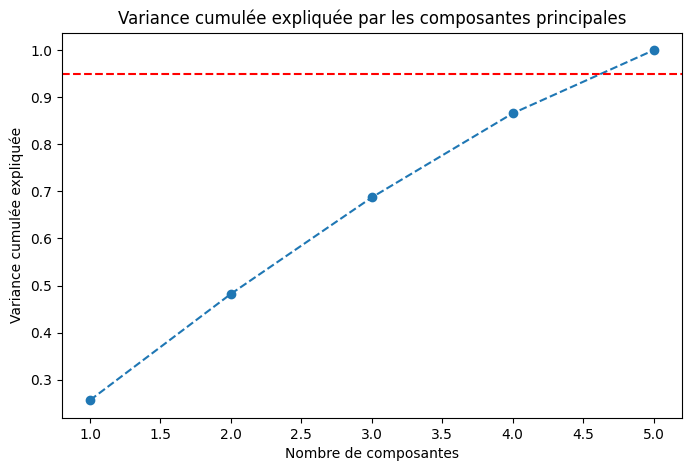

Nombre optimal de composantes pour expliquer 95% de la variance : 4


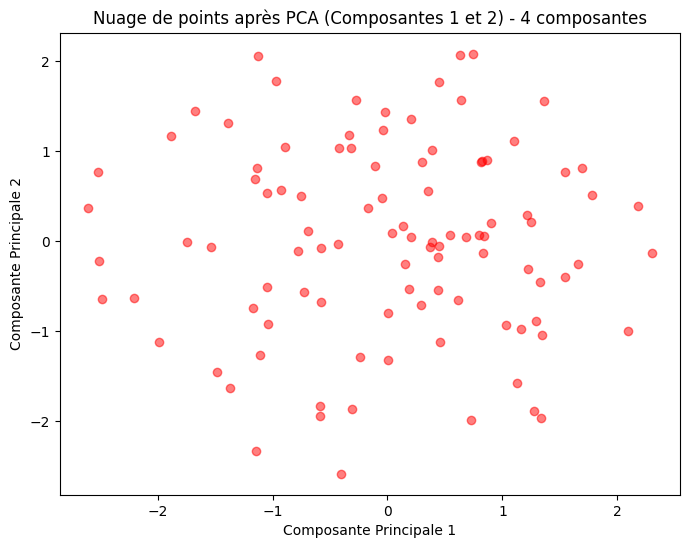

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

np.random.seed(42)#fixe le generateur de nombres aleatoires
data_pca = pd.DataFrame({
    'Age': np.random.randint(20, 60, size=100),
    'Salaire': np.random.randint(20000, 100000, size=100),
    'Experience': np.random.randint(1, 40, size=100),
    'Nb_Enfants': np.random.randint(0, 5, size=100),
    'Score': np.random.uniform(0, 10, size=100)
})# crée une DataFrame à partir d'un dictionnaire

plt.figure(figsize=(8, 6))# fixe la taille de la figure
plt.scatter(data_pca['Age'], data_pca['Salaire'], color='b', alpha=0.5)#crée un nuage de point
plt.title('Nuage de points (Age vs Salaire) - Avant PCA')#crée le titre à la figure
plt.xlabel('Age') #étiquette de l'axe x
plt.ylabel('Salaire')# étiquette de l'axe y
plt.show() # affiche la figure


scaler = StandardScaler()# objet de la classe StandardScaler
data_scaled = scaler.fit_transform(data_pca) #normalise data_pca

pca = PCA() #Objet de PCA
pca.fit(data_scaled)# transforme data_scaled

explained_variance = pca.explained_variance_ratio_#calcule les variance des variable

plt.figure(figsize=(8, 5))# fixe la taille de la figure
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')#trace un graphique linéaire
plt.title('Variance expliquée par chaque composante')#crée le titre à la figure
plt.xlabel('Nombre de composantes') #étiquette de l'axe x
plt.ylabel('Proportion de variance expliquée') # étiquette de l'axe y
plt.show()# affiche la figure


cumulative_variance = explained_variance.cumsum()# cumulative des variances
plt.figure(figsize=(8, 5)) # fixe la taille de la figure
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')#trace un graphique linéaire
plt.title('Variance cumulée expliquée par les composantes principales')#crée le titre à la figure
plt.xlabel('Nombre de composantes')#étiquette de l'axe x
plt.ylabel('Variance cumulée expliquée')# étiquette de l'axe y
plt.axhline(y=0.95, color='r', linestyle='--')#ajoute une ligne horizontale sur la figure à y=0.95
plt.show()# affiche la figure

n_components = (cumulative_variance <= 0.95).sum()# calcule du nombre de composents
print(f"Nombre optimal de composantes pour expliquer 95% de la variance : {n_components}")# affiche le nombre de composants calculés

pca = PCA(n_components=n_components)# initialise PCA avec le nombre de composents
data_pca_reduced = pca.fit_transform(data_scaled)# transforme data_scaled


plt.figure(figsize=(8, 6)) # fixe la taille de la figure
plt.scatter(data_pca_reduced[:, 0], data_pca_reduced[:, 1], color='r', alpha=0.5)#crée un nuage de point
plt.title(f'Nuage de points après PCA (Composantes 1 et 2) - {n_components} composantes')#crée le titre à la figure
plt.xlabel('Composante Principale 1')#étiquette de l'axe x
plt.ylabel('Composante Principale 2')# étiquette de l'axe y
plt.show()# affiche la figure


**Tâche à réaliser : Sélection et Extraction des Caractéristiques**

**Contexte :** Dans cette tâche, vous utiliserez un jeu de données appelé data_genes.csv (disponible sur moodle), qui contient plusieurs variables. L'objectif de cette activité est d'appliquer des méthodes de sélection de caractéristiques et d'extraction de caractéristiques via l'Analyse en Composantes Principales (ACP).

Avant de commencer les étapes suivantes, vous devrez charger le jeu de données en utilisant la commande suivante:

pd.read_csv('/chemin_vers_votre_fichier/data_genes.csv')

où 'chemin_vers_votre_fichier' est le chemin vers votre fichier csv et "pd" est l'alias que vous avez attribué à la bibliothèque pandas.

1. Sélection des Caractéristiques :
Commencez par appliquer la sélection des caractéristiques afin de retenir uniquement les variables les plus pertinentes pour la modélisation. Vous pouvez utiliser des méthodes de sélection telles que :

Sélection univariée avec des tests statistiques comme SelectKBest et f_classif.
Sélection basée sur les modèles en utilisant des méthodes comme l'élimination récursive des caractéristiques (RFE) ou la sélection basée sur les arbres.
Objectif : Sélectionner les caractéristiques les plus significatives qui ont un impact important sur la variable cible. Testez différentes méthodes et comparez les résultats obtenus.

2. Extraction des Caractéristiques avec ACP :
Une fois les caractéristiques sélectionnées, vous devrez appliquer l'Analyse en Composantes Principales (PCA) sur les données restantes pour réduire la dimensionnalité tout en préservant un maximum de variance.

Instructions :

Appliquez PCA sur les données sélectionnées.
Déterminez le nombre optimal de composantes à conserver en utilisant la méthode des coudes.
Projetez les données dans l'espace réduit et visualisez les résultats.
Critères de réussite :

Vous avez sélectionné un sous-ensemble des caractéristiques les plus significatives.
Vous avez réduit la dimensionnalité des données avec PCA et expliqué au moins 95% de la variance.
Vous avez visualisé la variance expliquée par chaque composante ainsi que la projection des données dans l'espace réduit.
Remarque : N'oubliez pas de normaliser les données avant d'appliquer PCA, car cette méthode est sensible à l'échelle des variables.

## <div class="alert alert-block alert-info">Vous devez retourner ce notebook avec les commentaires sur l'ensemble du code y compris la partie faite durant la séance de l'atelier !</div>


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif,RFE # selectionne les meilleures caractéristiques
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [6]:
data=pd.read_csv("/content/drive/MyDrive/atelier 2/data_genes.csv")#importe data_genes
data= data.drop(data.columns[0], axis=1)

**Sélection univariée avec SelectKBest et f_classif**

In [15]:
np.random.seed(42)
y = np.random.randint(0,2, len(data))
selector = SelectKBest(f_classif, k=10) # objet de la classe SelectKBest
data_new = selector.fit_transform(data, y) # selectionne des deux meilleures caractéristiques
selected_features = data.columns[selector.get_support()]# Extraire les variables selectionner
selected_features

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [    5    23  4370  4808  4809  4814  4816  4817  4831  5288  7661  7662
  7663  7664  7665  8121  9304  9306  9314  9316  9320  9452 10121 11958
 13991 14158 14159 14161 15138 15140 15141 15446 16566 16568 16569 16571
 16575 16578 16579 16604 16634 16637 16677 16697 16698 16699 16700 16701
 16702 16704 16705 16706 16707 16708 16709 16710 16711 16712 16713 16714
 16715 16716 16717 16718 16719 16720 16721 16722 16723 16724 16725 16726
 16727 16728 16729 16730 16731 16732 16733 16734 16735 16736 16737 16738
 16739 16740 16741 16742 16743 16744 16745 16746 16748 16749 16750 16751
 16752 16753 16754 16756 16757 16758 16759 16760 16761 16762 16763 16764
 16765 16766 16767 16768 16769 16770 16771 16772 16774 16775 16776 16777
 16778 16779 16780 16781 16782 16783 16785 16787 16788 16789 16790 16791
 16792 16794 16795 16796 16798 16799 16800 16801 16802 16803 16804 16805
 16806

Index(['gene_7', 'gene_1614', 'gene_4174', 'gene_6819', 'gene_7512',
       'gene_10143', 'gene_10393', 'gene_12605', 'gene_14766', 'gene_19653'],
      dtype='object')

In [16]:
selected_features = data.columns[selector.get_support()]# Extraire les variables selectionner
print('colonnes selectionnées:',selected_features)# affiche les 10 meilleurs caractéristiques
data_neuw_data=pd.DataFrame(data_new,columns=selected_features)#DataFrame des 10 meilleurs caractéristiques
print(data_neuw_data)# affiche le DataFrame

colonnes selectionnées: Index(['gene_7', 'gene_1614', 'gene_4174', 'gene_6819', 'gene_7512',
       'gene_10143', 'gene_10393', 'gene_12605', 'gene_14766', 'gene_19653'],
      dtype='object')
       gene_7  gene_1614  gene_4174  gene_6819  gene_7512  gene_10143  \
0    0.591871   0.000000   0.000000   6.865820   7.190289    4.377061   
1    0.000000   0.000000   1.813607   8.334050   8.173652    6.247062   
2    0.452595   0.000000   0.000000   4.763576   7.756223    5.804921   
3    0.434882   0.000000   1.637239   5.967242   7.408194    5.336301   
4    0.360982   0.000000   3.661658   7.552800   8.107960    4.960368   
..        ...        ...        ...        ...        ...         ...   
796  0.496922   0.000000   2.841671   7.730477   8.224711    5.368112   
797  0.000000   0.000000   0.618051   7.714871   6.204127    5.000721   
798  1.811101   4.464433   1.002595   8.131924   8.393240    5.733061   
799  0.000000   0.000000   0.000000   6.738930   7.715214    5.691272   
800 

In [17]:
scores=selector.scores_
feature_scores=pd.DataFrame({'Feature':data.columns,'Score':scores})
feature_scores=feature_scores.sort_values(by='Score',ascending=False)
print(scores)

[1.45519904e+00 7.29695656e-01 7.36333842e-01 ... 1.13720899e-03
 2.02461966e+00 2.61216652e+00]


**Sélection univariée avec Chi2**

In [22]:
from sklearn.feature_selection import chi2
# Appliquer le test de chi² pour sélectionner les meilleures caractéristiques
k_best = 10  # Nombre de caractéristiques à sélectionner (modifiable)
selector_chi2 = SelectKBest(score_func=chi2, k=k_best)
data_selected_chi2 = selector_chi2.fit_transform(data, y)
# Obtenir les caractéristiques sélectionnées
selected_features_chi2 = data.columns[selector_chi2.get_support()]
print(f"Les {k_best} meilleures caractéristiques sélectionnées :", selected_features_chi2.tolist())

# Vérifier la nouvelle forme des données
print("Dimensions après sélection :", data_selected_chi2.shape)

Les 10 meilleures caractéristiques sélectionnées : ['gene_1614', 'gene_3532', 'gene_3840', 'gene_4174', 'gene_4318', 'gene_5818', 'gene_9465', 'gene_11636', 'gene_14422', 'gene_18858']
Dimensions après sélection : (801, 10)


**Sélection avec RFE (Recursive Feature Elimination)**

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(model, n_features_to_select=10)
data_selected_rfe = rfe.fit_transform(data, y)

selected_features_rfe = data.columns[rfe.support_()]
print("Caractéristiques sélectionnées (RFE) avec RandomForest :", selected_features_rfe.tolist())

KeyboardInterrupt: 

**Sélection de caractéristiques basée sur l'arbre**

In [30]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
import numpy as np
clf = ExtraTreesClassifier(n_estimators=42, random_state=42)
clf = clf.fit(data, y)
importance=clf.feature_importances_
model = SelectFromModel(clf, prefit=True)
data_new = model.transform(data)
indices = np.argsort(importance)[::-1]  # Trier par importance décroissante

# Sélectionner les 10 meilleures caractéristiques
top_n = 10
selected_indices = indices[:top_n]
selected_features_clf = data.columns[selected_indices]
data_new = data[selected_features_clf]
print("Caractéristiques sélectionnées :", selected_features_clf.tolist())

Caractéristiques sélectionnées : ['gene_19654', 'gene_7893', 'gene_1537', 'gene_9220', 'gene_17622', 'gene_2977', 'gene_11432', 'gene_20463', 'gene_19156', 'gene_1933']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


**Comparaison des differentes methodes:**


Les methodes **SelectKbest** et **chi2** selectionnent les caracteristiques ayant des valeurs proches des valeurs de la caracteristique cible alors que **la methode basée sur l'arbre** selectionne les caractéristiques qui sont des faibles variances




**Methode de PCA avec SelectKBest**

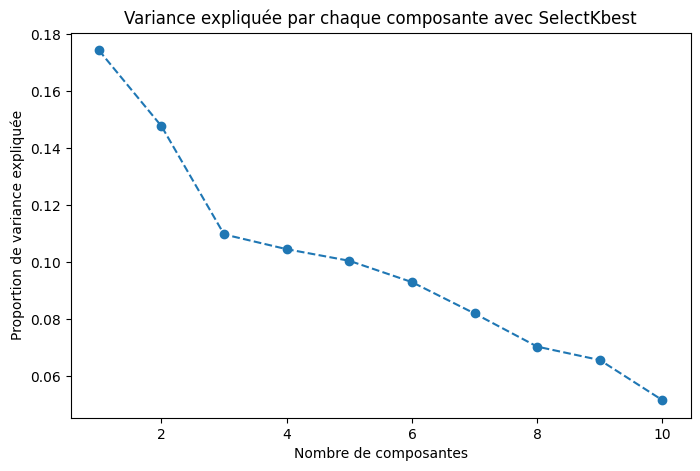

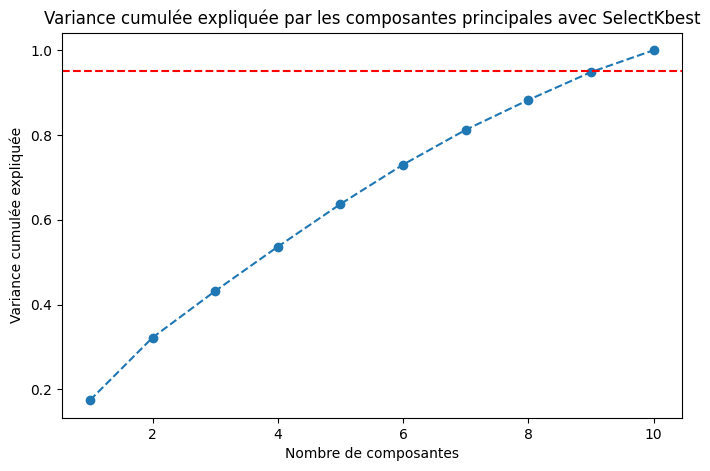

Nombre optimal de composantes pour expliquer 95% de la variance avec SelectKbest : 9


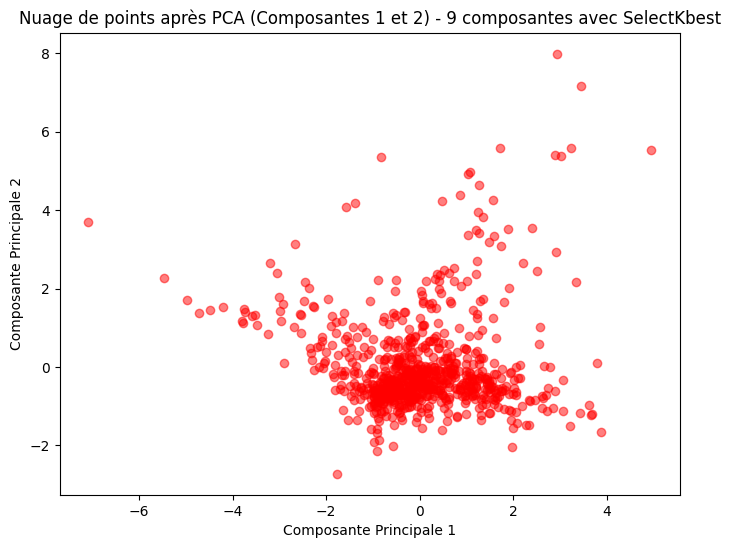

In [32]:
#On choisit l'une des méthodes pour PCA
data_final = data[selected_features]
#Normalisation des données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_final)
#Application de l'ACP
pca = PCA()
pca.fit_transform(data_scaled)

explained_variance = pca.explained_variance_ratio_#calcule les variance des variable

plt.figure(figsize=(8, 5))# fixe la taille de la figure
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')#trace un graphique linéaire
plt.title('Variance expliquée par chaque composante avec SelectKbest')#crée le titre à la figure
plt.xlabel('Nombre de composantes') #étiquette de l'axe x
plt.ylabel('Proportion de variance expliquée') # étiquette de l'axe y
plt.show()# affiche la figure

cumulative_variance = explained_variance.cumsum()# cumulative des variances
plt.figure(figsize=(8, 5)) # fixe la taille de la figure
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')#trace un graphique linéaire
plt.title('Variance cumulée expliquée par les composantes principales avec SelectKbest')#crée le titre à la figure
plt.xlabel('Nombre de composantes')#étiquette de l'axe x
plt.ylabel('Variance cumulée expliquée')# étiquette de l'axe y
plt.axhline(y=0.95, color='r', linestyle='--')#ajoute une ligne horizontale sur la figure à y=0.95
plt.show()# affiche la figure


n_components = (cumulative_variance <= 0.95).sum()# calcule du nombre de composents
print(f"Nombre optimal de composantes pour expliquer 95% de la variance avec SelectKbest : {n_components}")# affiche le nombre de composants calculés

pca = PCA(n_components=n_components)# initialise PCA avec le nombre de composents
data_pca_reduced = pca.fit_transform(data_scaled)# transforme data_scaled


plt.figure(figsize=(8, 6)) # fixe la taille de la figure
plt.scatter(data_pca_reduced[:, 0], data_pca_reduced[:, 1], color='r', alpha=0.5)#crée un nuage de point
plt.title(f'Nuage de points après PCA (Composantes 1 et 2) - {n_components} composantes avec SelectKbest')#crée le titre à la figure
plt.xlabel('Composante Principale 1')#étiquette de l'axe x
plt.ylabel('Composante Principale 2')# étiquette de l'axe y
plt.show()# affiche la figure

**Methode PCA avec Chi**

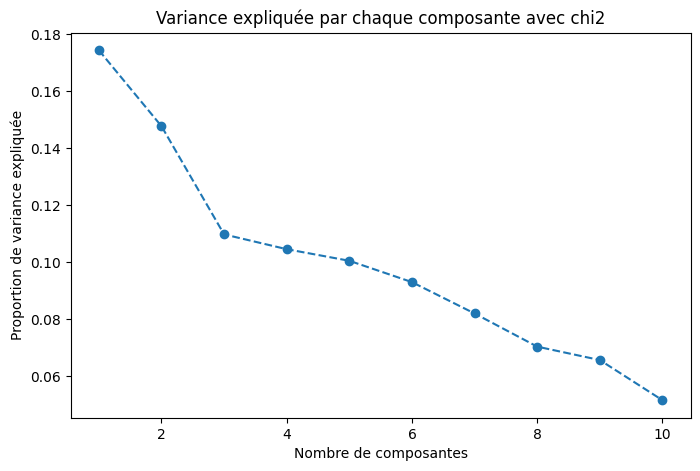

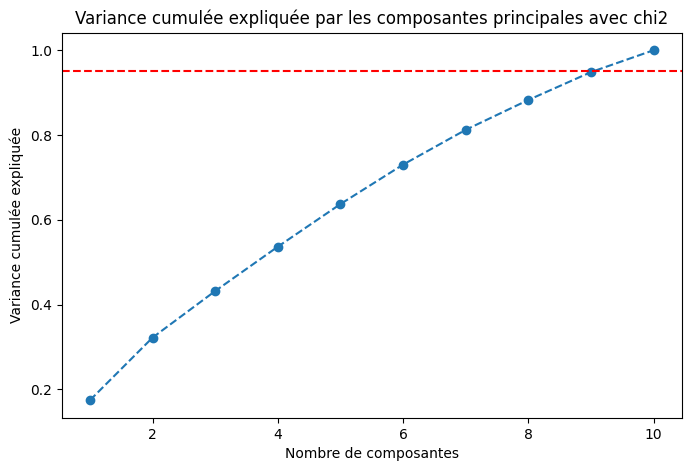

Nombre optimal de composantes pour expliquer 95% de la variance : 9


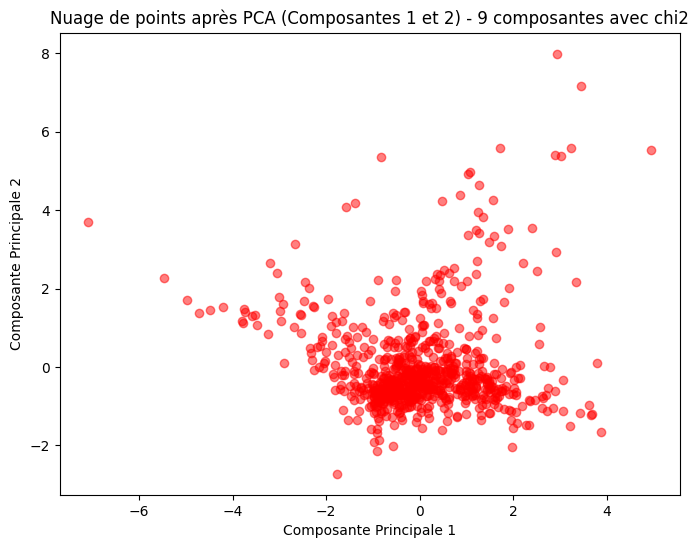

In [33]:
#On choisit l'une des méthodes pour PCA
data_final_chi2 = data[selected_features_chi2]
#Normalisation des données
scaler = StandardScaler()
data_scaled_chi2 = scaler.fit_transform(data_final_chi2)
#Application de l'ACP
pca = PCA()
pca.fit_transform(data_scaled_chi2)

explained_variance = pca.explained_variance_ratio_#calcule les variance des variable

plt.figure(figsize=(8, 5))# fixe la taille de la figure
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')#trace un graphique linéaire
plt.title('Variance expliquée par chaque composante avec chi2')#crée le titre à la figure
plt.xlabel('Nombre de composantes') #étiquette de l'axe x
plt.ylabel('Proportion de variance expliquée') # étiquette de l'axe y
plt.show()# affiche la figure

cumulative_variance = explained_variance.cumsum()# cumulative des variances
plt.figure(figsize=(8, 5)) # fixe la taille de la figure
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')#trace un graphique linéaire
plt.title('Variance cumulée expliquée par les composantes principales avec chi2')#crée le titre à la figure
plt.xlabel('Nombre de composantes')#étiquette de l'axe x
plt.ylabel('Variance cumulée expliquée')# étiquette de l'axe y
plt.axhline(y=0.95, color='r', linestyle='--')#ajoute une ligne horizontale sur la figure à y=0.95
plt.show()# affiche la figure


n_components = (cumulative_variance <= 0.95).sum()# calcule du nombre de composents
print(f"Nombre optimal de composantes pour expliquer 95% de la variance : {n_components}")# affiche le nombre de composants calculés

pca = PCA(n_components=n_components)# initialise PCA avec le nombre de composents
data_pca_reduced = pca.fit_transform(data_scaled)# transforme data_scaled


plt.figure(figsize=(8, 6)) # fixe la taille de la figure
plt.scatter(data_pca_reduced[:, 0], data_pca_reduced[:, 1], color='r', alpha=0.5)#crée un nuage de point
plt.title(f'Nuage de points après PCA (Composantes 1 et 2) - {n_components} composantes avec chi2')#crée le titre à la figure
plt.xlabel('Composante Principale 1')#étiquette de l'axe x
plt.ylabel('Composante Principale 2')# étiquette de l'axe y
plt.show()# affiche la figure


**méthodes pour PCA**

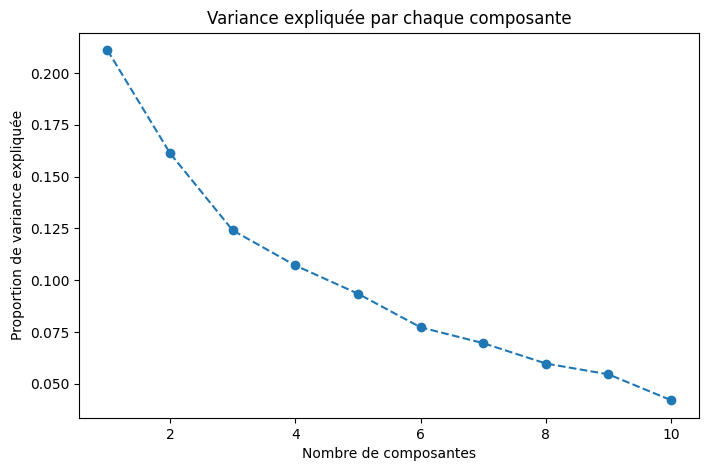

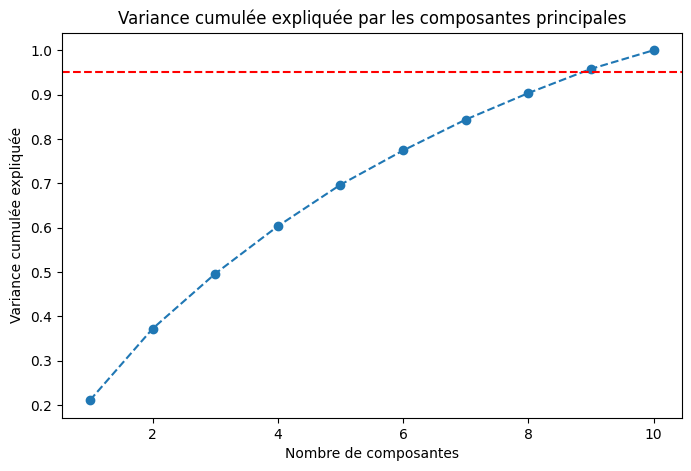

Nombre optimal de composantes pour expliquer 95% de la variance : 8


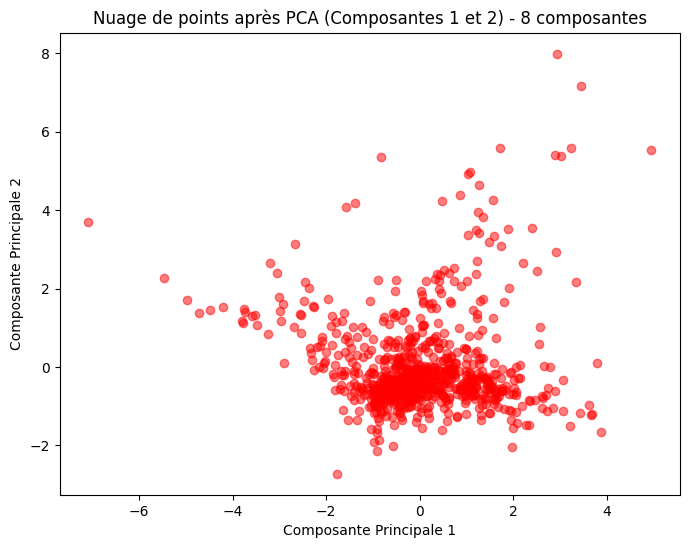

In [34]:
#On choisit l'une des méthodes pour PCA
data_final_clf = data[selected_features_clf]
#Normalisation des données
scaler_clf = StandardScaler()
data_scaled_clf = scaler_clf.fit_transform(data_final_clf)
#Application de l'ACP
pca = PCA()
pca.fit_transform(data_scaled_clf)

explained_variance = pca.explained_variance_ratio_#calcule les variance des variable

plt.figure(figsize=(8, 5))# fixe la taille de la figure
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')#trace un graphique linéaire
plt.title('Variance expliquée par chaque composante')#crée le titre à la figure
plt.xlabel('Nombre de composantes') #étiquette de l'axe x
plt.ylabel('Proportion de variance expliquée') # étiquette de l'axe y
plt.show()# affiche la figure

cumulative_variance = explained_variance.cumsum()# cumulative des variances
plt.figure(figsize=(8, 5)) # fixe la taille de la figure
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')#trace un graphique linéaire
plt.title('Variance cumulée expliquée par les composantes principales')#crée le titre à la figure
plt.xlabel('Nombre de composantes')#étiquette de l'axe x
plt.ylabel('Variance cumulée expliquée')# étiquette de l'axe y
plt.axhline(y=0.95, color='r', linestyle='--')#ajoute une ligne horizontale sur la figure à y=0.95
plt.show()# affiche la figure


n_components = (cumulative_variance <= 0.95).sum()# calcule du nombre de composents
print(f"Nombre optimal de composantes pour expliquer 95% de la variance : {n_components}")# affiche le nombre de composants calculés

pca = PCA(n_components=n_components)# initialise PCA avec le nombre de composents
data_pca_reduced = pca.fit_transform(data_scaled)# transforme data_scaled


plt.figure(figsize=(8, 6)) # fixe la taille de la figure
plt.scatter(data_pca_reduced[:, 0], data_pca_reduced[:, 1], color='r', alpha=0.5)#crée un nuage de point
plt.title(f'Nuage de points après PCA (Composantes 1 et 2) - {n_components} composantes')#crée le titre à la figure
plt.xlabel('Composante Principale 1')#étiquette de l'axe x
plt.ylabel('Composante Principale 2')# étiquette de l'axe y
plt.show()# affiche la figure
